Step 1: Load and analyze the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_df = pd.read_csv('./kaggle/input/home-data-for-ml-course/train.csv', encoding='latin-1')
train_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test_df = pd.read_csv('./kaggle/input/home-data-for-ml-course/test.csv')
test_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train_df['dataset_type'] = 'train'
test_df['dataset_type'] = 'test'
combined_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)
combined_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0,train


In [5]:
print(combined_df.info())
print(combined_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
combined_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
dataset_type      object
Length: 82, dtype: object

Step 2: Compute and correct the missing values:

In [7]:
print (combined_df.isnull().sum())
combined_df.head(1460)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
dataset_type        0
Length: 82, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0,train


In [8]:
# Calculate the percentage of missing values in each row
missing_percentage = combined_df.isnull().sum(axis=1) / combined_df.shape[1] * 100

# IMPORTANT: Preserve ALL test rows, only filter training rows by missing values
test_mask = combined_df['dataset_type'] == 'test'
train_mask = combined_df['dataset_type'] == 'train'

# Filter training rows: keep only those with <=20% missing AND with valid SalePrice
train_keep = train_mask & (missing_percentage <= 20) & (combined_df['SalePrice'].notnull())

# Keep ALL test rows regardless of missing values
test_keep = test_mask

# Combine: keep all test rows and filtered training rows
mask = train_keep | test_keep
filtered_df = combined_df[mask].copy()

# Display the filtered DataFrame
print(f'Original combined_df: {combined_df.shape[0]} rows')
print(f'After filtering: {filtered_df.shape[0]} rows')
print(f'  - Train rows kept: {train_keep.sum()}')
print(f'  - Test rows kept: {test_keep.sum()} (all preserved)')
filtered_df.head(1460)

Original combined_df: 2919 rows
After filtering: 2919 rows
  - Train rows kept: 1460
  - Test rows kept: 1459 (all preserved)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0,train


In [9]:
# Already handled in previous step - test rows are all preserved
# Just verify the counts
print('Row counts after filtering:')
if 'dataset_type' in filtered_df.columns:
    train_count = (filtered_df['dataset_type'] == 'train').sum()
    test_count = (filtered_df['dataset_type'] == 'test').sum()
    print(f'  Train rows: {train_count}')
    print(f'  Test rows: {test_count} (should be 1459)')
print(f'Total rows: {filtered_df.shape[0]}')
filtered_df.head(1460)

Row counts after filtering:
  Train rows: 1460
  Test rows: 1459 (should be 1459)
Total rows: 2919


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0,train


In [10]:
# IMPORTANT: Calculate missing percentages only on training data to preserve test columns
train_data = filtered_df[filtered_df['dataset_type'] == 'train']
test_data = filtered_df[filtered_df['dataset_type'] == 'test']

# Calculate missing percentage based on TRAINING data only
missing_percentage = train_data.isnull().sum() / len(train_data) * 100

# Filter out columns with more than 30% missing in TRAINING data, but keep protected columns
protected_cols = ['SalePrice', 'Id', 'dataset_type']
keep_cols = missing_percentage[missing_percentage <= 30].index.tolist()
for col in protected_cols:
    if col in filtered_df.columns and col not in keep_cols:
        keep_cols.append(col)
filtered_df = filtered_df.loc[:, keep_cols]

# Diagnostic prints to help debug empty training set
print('combined_df rows:', combined_df.shape[0])
print('filtered_df rows after row-filtering:', filtered_df.shape[0])
print('columns kept (count):', len(keep_cols))
if 'dataset_type' in filtered_df.columns:
    print('dataset_type value counts:')
    print(filtered_df['dataset_type'].value_counts(dropna=False))
    print(f'  - Train: {(filtered_df["dataset_type"] == "train").sum()}')
    print(f'  - Test: {(filtered_df["dataset_type"] == "test").sum()} (should be 1459)')
else:
    print('dataset_type column missing')

if 'SalePrice' in filtered_df.columns:
    print('SalePrice non-null in train:', filtered_df.loc[filtered_df['dataset_type']=='train','SalePrice'].notnull().sum())
else:
    print('SalePrice column missing')

# Display the filtered DataFrame
print(filtered_df.shape)
filtered_df.head(1460)

combined_df rows: 2919
filtered_df rows after row-filtering: 2919
columns kept (count): 76
dataset_type value counts:
dataset_type
train    1460
test     1459
Name: count, dtype: int64
  - Train: 1460
  - Test: 1459 (should be 1459)
SalePrice non-null in train: 1460
(2919, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125.0,train


In [11]:
# Select numerical columns with missing values
numerical_cols = filtered_df.select_dtypes(include=np.number).columns[filtered_df.select_dtypes(include=np.number).isnull().any()]

# Impute missing values with mean for all numerical columns
for col in numerical_cols:
    imputer = SimpleImputer(strategy='mean')
    filtered_df[col] = imputer.fit_transform(filtered_df[[col]])

# Display the updated DataFrame
filtered_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125.0,train


In [12]:
# Select categorical columns with missing values
categorical_cols = filtered_df.select_dtypes(exclude=np.number).columns[filtered_df.select_dtypes(exclude=np.number).isnull().any()]

# Impute missing values with mode for categorical columns
for col in categorical_cols:
    mode_value = filtered_df[col].mode()[0]  # Get the mode value
    filtered_df[col] = filtered_df[col].fillna(mode_value)  # Fill missing values with mode

# Display the updated DataFrame
filtered_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125.0,train


In [13]:
# Remove duplicate rows (keeping the first occurrence)
filtered_df = filtered_df.drop_duplicates(keep='first')

# Print the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", filtered_df.shape)

# Display the updated DataFrame
filtered_df.head(1460)

Shape after removing duplicates: (2919, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000.0,train
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000.0,train
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500.0,train
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125.0,train


In [14]:
print(filtered_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dataset_type     0
Length: 76, dtype: int64


Step 3: Label encoding

In [15]:
# PRESERVE dataset_type before encoding
dataset_type_backup = filtered_df['dataset_type'].copy() if 'dataset_type' in filtered_df.columns else None

# Select categorical columns (exclude dataset_type)
categorical_cols = [c for c in filtered_df.select_dtypes(include=['object']).columns if c != 'dataset_type']

# Apply label encoding per column (fit on combined train+test so mappings are consistent)
for col in categorical_cols:
    le = LabelEncoder()
    # Ensure strings to avoid errors with NaN
    filtered_df[col] = filtered_df[col].astype(str)
    filtered_df[col] = le.fit_transform(filtered_df[col])

# Encode dataset_type numerically with explicit mapping (train=1, test=0)
if dataset_type_backup is not None:
    filtered_df['dataset_type'] = (dataset_type_backup == 'train').astype(int)  # train=1, test=0
    print('dataset_type encoded: train=1, test=0')

# Display the updated DataFrame
print('Shape after encoding:', filtered_df.shape)
if 'dataset_type' in filtered_df.columns:
    print('dataset_type unique values:', filtered_df['dataset_type'].unique())
    print('dataset_type counts - train (1):', (filtered_df['dataset_type'] == 1).sum(), ', test (0):', (filtered_df['dataset_type'] == 0).sum())
filtered_df.head(1460)

encoded_df = filtered_df

dataset_type encoded: train=1, test=0
Shape after encoding: (2919, 76)
dataset_type unique values: [1 0]
dataset_type counts - train (1): 1460 , test (0): 1459


Step 4: Removing outliers

In [16]:
# Get list of numerical columns (exclude target and Id)
numerical_columns = [c for c in encoded_df.select_dtypes(include=['number']).columns.tolist() if c not in ['SalePrice', 'Id']]

# Convert all numerical columns to float to avoid dtype incompatibility warnings
for col in numerical_columns:
    encoded_df[col] = encoded_df[col].astype(float)

# Iterate over each numerical column to replace outliers
for col in numerical_columns:
    # Calculate mean and standard deviation
    mean = encoded_df[col].mean()
    std = encoded_df[col].std()

    # Define outlier boundaries
    lower_bound = mean - 3 * std  # Example: 3 standard deviations below the mean
    upper_bound = mean + 3 * std  # Example: 3 standard deviations above the mean

    # Replace outliers with mean
    encoded_df.loc[(encoded_df[col] < lower_bound) | (encoded_df[col] > upper_bound), col] = mean

# Print the cleaned DataFrame
print("\nData after replacing outliers with mean:")
print(encoded_df.describe())


Data after replacing outliers with mean:
                Id   MSSubClass     MSZoning  LotFrontage       LotArea  \
count  2919.000000  2919.000000  2919.000000  2919.000000   2919.000000   
mean   1460.000000    54.361220     3.150240    68.360221   9645.577016   
std     842.787043    37.828808     0.379494    18.547795   3978.207590   
min       1.000000    20.000000     2.000000    21.000000   1300.000000   
25%     730.500000    20.000000     3.000000    60.000000   7478.000000   
50%    1460.000000    50.000000     3.000000    69.305795   9453.000000   
75%    2189.500000    70.000000     3.000000    78.000000  11424.000000   
max    2919.000000   180.000000     4.000000   133.000000  33120.000000   

            Street     LotShape  LandContour     Utilities    LotConfig  ...  \
count  2919.000000  2919.000000  2919.000000  2.919000e+03  2919.000000  ...   
mean      0.999983     1.947585     2.888286  1.173632e-07     3.055841  ...   
std       0.000263     1.409721     0.4178

Step 5: Removing unnecessary features with co-linearity test

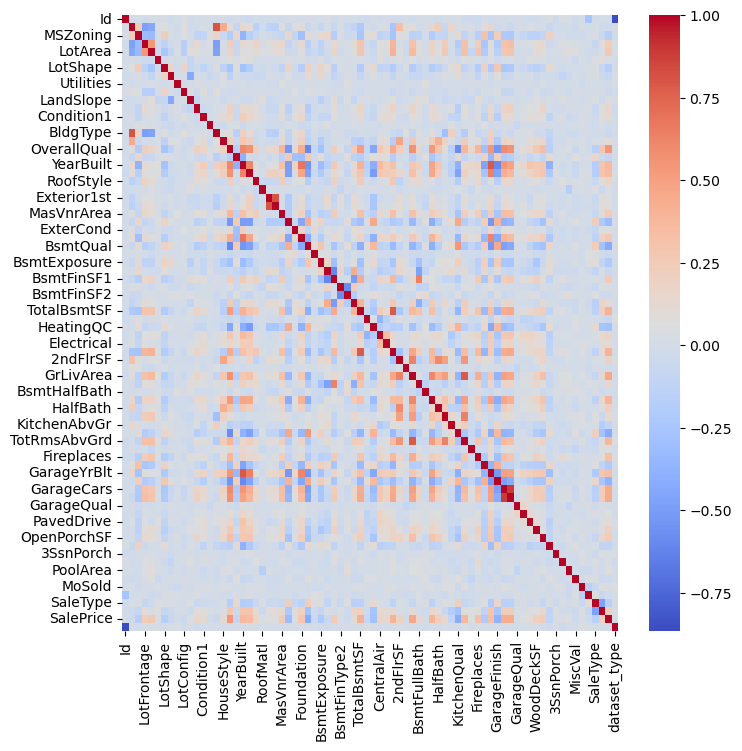

In [17]:
# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Display the correlation matrix
correlation_matrix

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Customize annotation and color map
plt.show()

In [18]:
# Set the correlation threshold
threshold = 0.8

# Find highly correlated features (but don't drop target/Id/dataset_type)
highly_correlated_features = set()  # Use a set to avoid duplicates
protected_cols = set(['SalePrice', 'Id', 'dataset_type'])
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]  # Get the name of the highly correlated feature
            if colname not in protected_cols:
                highly_correlated_features.add(colname)

# Print the highly correlated features
print("Highly Correlated Features:", highly_correlated_features)

# Drop the highly correlated features from your DataFrame
encoded_df = encoded_df.drop(columns=highly_correlated_features)

Highly Correlated Features: {'GarageArea', 'BldgType', 'Exterior2nd'}


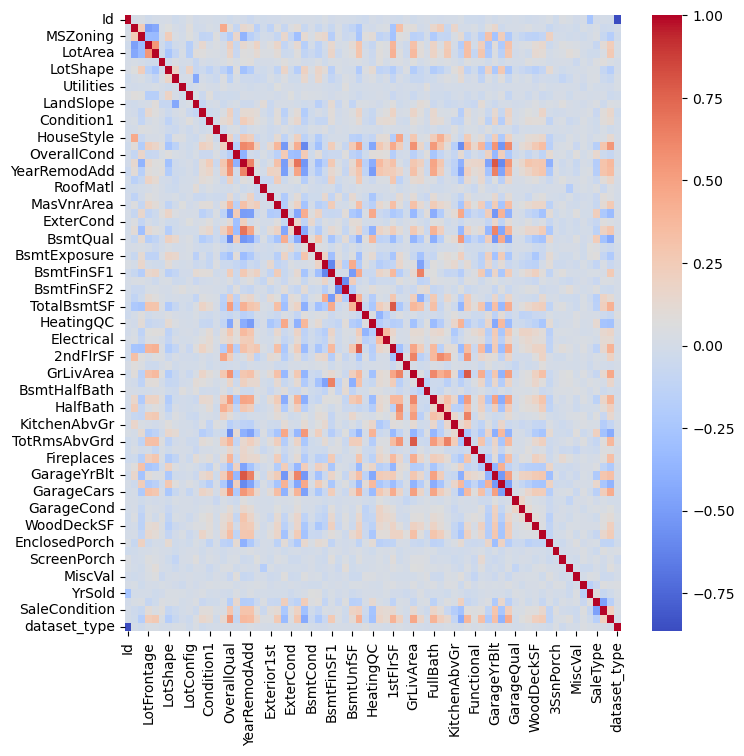

In [19]:
# Compute the new correlation matrix
correlation_matrix = encoded_df.corr()

# Display the correlation matrix
correlation_matrix

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Customize annotation and color map
plt.show()

Step 6: Add new features (Feature Engineering)

In [20]:
# Select numerical features (excluding target and ID)
numerical_features = encoded_df.select_dtypes(include=['number']).columns.tolist()
numerical_features = [f for f in numerical_features if f not in ['SalePrice', 'Id']]

# Select only linear features (degree=1)
linear_features = encoded_df[numerical_features]

In [21]:
import pandas as pd

# Assuming 'Date' is your date column
# If you have multiple date columns, repeat these steps for each
if 'Date' in encoded_df.columns:
    encoded_df['Date'] = pd.to_datetime(encoded_df['Date'])  # Convert to datetime if not already

    # Extract features
    encoded_df['Year'] = encoded_df['Date'].dt.year
    encoded_df['Month'] = encoded_df['Date'].dt.month
    encoded_df['Day'] = encoded_df['Date'].dt.day
    encoded_df['DayOfWeek'] = encoded_df['Date'].dt.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)
    encoded_df['WeekOfYear'] = encoded_df['Date'].dt.isocalendar().week  # Week of the year
    encoded_df['Quarter'] = encoded_df['Date'].dt.quarter  # Quarter of the year

In [22]:
# Create bins for SalePrice if present (use training rows only)
if 'SalePrice' in encoded_df.columns and encoded_df['SalePrice'].notnull().any():
    # dataset_type: train=1, test=0
    train_mask = encoded_df['dataset_type'] == 1 if 'dataset_type' in encoded_df.columns else encoded_df.index.notnull()
    
    # Price ranges (fixed bins)
    encoded_df.loc[train_mask, 'price_range'] = pd.cut(encoded_df.loc[train_mask, 'SalePrice'], bins=[0, 100000, 200000, 300000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
    # Quantile-based quartiles: only apply if there are enough unique values
    sp = encoded_df.loc[train_mask, 'SalePrice'].dropna()
    if len(sp.unique()) >= 4:
        encoded_df.loc[sp.index, 'price_quartile'] = pd.qcut(sp, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    elif len(sp.unique()) >= 2:
        k = min(4, len(sp.unique()))
        labels = [f'Q{i+1}' for i in range(k)]
        encoded_df.loc[sp.index, 'price_quartile'] = pd.qcut(sp, q=k, labels=labels)
    else:
        # Not enough variation to form quartiles; mark as single group
        encoded_df.loc[train_mask, 'price_quartile'] = 'Q1'
    
    # Encode categories safely, handling missing values in test rows
    if 'price_range' in encoded_df.columns:
        # Convert categorical to object, then fill NaN, then encode
        encoded_df['price_range'] = encoded_df['price_range'].astype(object).fillna('Missing')
        le_range = LabelEncoder()
        encoded_df['price_range'] = le_range.fit_transform(encoded_df['price_range'])
    else:
        encoded_df['price_range'] = -1
    
    if 'price_quartile' in encoded_df.columns:
        # Convert categorical to object, then fill NaN, then encode
        encoded_df['price_quartile'] = encoded_df['price_quartile'].astype(object).fillna('Missing')
        le_quartile = LabelEncoder()
        encoded_df['price_quartile'] = le_quartile.fit_transform(encoded_df['price_quartile'])
    else:
        encoded_df['price_quartile'] = -1
else:
    # No SalePrice column available — create placeholder encoded columns
    encoded_df['price_range'] = -1
    encoded_df['price_quartile'] = -1

encoded_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type,price_range,price_quartile
0,1,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,2.0,2008.0,8.0,4.000000,208500.0,1.0,0,3
1,2,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.000000,5.0,2007.0,8.0,4.000000,181500.0,1.0,2,3
2,3,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.000000,9.0,2008.0,8.0,4.000000,223500.0,1.0,0,4
3,4,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.000000,2.0,2006.0,8.0,3.779034,140000.0,1.0,2,2
4,5,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,...,0.0,0.000000,12.0,2008.0,8.0,4.000000,250000.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,8.0,2007.0,8.0,4.000000,175000.0,1.0,2,3
1456,1457,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,2.0,2010.0,8.0,4.000000,210000.0,1.0,0,3
1457,1458,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,...,0.0,50.825968,5.0,2010.0,8.0,4.000000,266500.0,1.0,0,4
1458,1459,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,4.0,2010.0,8.0,4.000000,142125.0,1.0,2,2


Step 7 and 8: Train/Test split and Model Selection

In [23]:
# Remove duplicate columns
encoded_df = encoded_df.loc[:,~encoded_df.columns.duplicated()]

In [24]:
# Categorical columns already encoded earlier when operating on combined data
print(encoded_df.shape)
encoded_df.head(1460)

(2919, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type,price_range,price_quartile
0,1,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,2.0,2008.0,8.0,4.000000,208500.0,1.0,0,3
1,2,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.000000,5.0,2007.0,8.0,4.000000,181500.0,1.0,2,3
2,3,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.000000,9.0,2008.0,8.0,4.000000,223500.0,1.0,0,4
3,4,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.000000,2.0,2006.0,8.0,3.779034,140000.0,1.0,2,2
4,5,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,...,0.0,0.000000,12.0,2008.0,8.0,4.000000,250000.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,8.0,2007.0,8.0,4.000000,175000.0,1.0,2,3
1456,1457,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,2.0,2010.0,8.0,4.000000,210000.0,1.0,0,3
1457,1458,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,...,0.0,50.825968,5.0,2010.0,8.0,4.000000,266500.0,1.0,0,4
1458,1459,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,4.0,2010.0,8.0,4.000000,142125.0,1.0,2,2


In [25]:
# Ensure target column exists before splitting
if 'SalePrice' not in encoded_df.columns:
    raise KeyError('SalePrice column missing — check earlier column filtering to ensure SalePrice was preserved.')
X = encoded_df.drop(columns=['SalePrice']) # Features (all columns except SalePrice)
y = encoded_df['SalePrice']  # Target variable (SalePrice)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)
encoded_df.head(1460)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type,price_range,price_quartile
0,1,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,2.0,2008.0,8.0,4.000000,208500.0,1.0,0,3
1,2,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.000000,5.0,2007.0,8.0,4.000000,181500.0,1.0,2,3
2,3,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,...,0.0,0.000000,9.0,2008.0,8.0,4.000000,223500.0,1.0,0,4
3,4,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.000000,2.0,2006.0,8.0,3.779034,140000.0,1.0,2,2
4,5,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,...,0.0,0.000000,12.0,2008.0,8.0,4.000000,250000.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60.0,3.0,62.0,7917.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,8.0,2007.0,8.0,4.000000,175000.0,1.0,2,3
1456,1457,20.0,3.0,85.0,13175.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,2.0,2010.0,8.0,4.000000,210000.0,1.0,0,3
1457,1458,70.0,3.0,66.0,9042.0,1.0,3.0,3.0,0.0,4.0,...,0.0,50.825968,5.0,2010.0,8.0,4.000000,266500.0,1.0,0,4
1458,1459,20.0,3.0,68.0,9717.0,1.0,3.0,3.0,0.0,4.0,...,0.0,0.000000,4.0,2010.0,8.0,4.000000,142125.0,1.0,2,2


Step 9: Model Evaluation

In [26]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

# Calculate and print R-squared
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

Mean Squared Error: 780375614.1657203
R-squared: 0.7812057652477079


Step 10: Optimization

In [27]:
# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred_tuned = best_model.predict(X_val)
mse_tuned = mean_squared_error(y_val, y_pred_tuned)
r2_tuned = r2_score(y_val, y_pred_tuned)
print("Tuned MSE:", mse_tuned)
print("Tuned R-squared:", r2_tuned)

Best Hyperparameters: {'fit_intercept': True, 'positive': False}
Tuned MSE: 780375614.1657203
Tuned R-squared: 0.7812057652477079


In [28]:
# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores = -scores

# Calculate and print the average MSE
print("Average MSE:", mse_scores.mean())

Average MSE: 730100632.4136565


Step 11: Final Model

In [30]:
# Diagnostic: Check encoded_df before splitting
print('\n=== FINAL MODEL DIAGNOSTICS ===')
print('encoded_df shape:', encoded_df.shape)
print('encoded_df columns (first 10):', list(encoded_df.columns[:10]))

if 'dataset_type' in encoded_df.columns:
    print('dataset_type unique values:', encoded_df['dataset_type'].unique())
    print('dataset_type counts:', encoded_df['dataset_type'].value_counts(dropna=False).to_dict())
else:
    print('WARNING: dataset_type column missing!')
    print('Available columns:', list(encoded_df.columns))
    raise KeyError('dataset_type column is missing from encoded_df.')

if 'SalePrice' in encoded_df.columns:
    print('SalePrice non-null count:', encoded_df['SalePrice'].notnull().sum())
else:
    print('WARNING: SalePrice column missing!')

# Split processed data back into train and test (dataset_type: train=1, test=0)
train_processed = encoded_df[encoded_df['dataset_type'] == 1].copy()
test_processed = encoded_df[encoded_df['dataset_type'] == 0].copy()

print(f'\nAfter split: {len(train_processed)} train rows, {len(test_processed)} test rows')
print(f'Expected test rows: 1459')

if len(train_processed) == 0:
    raise ValueError('No training rows found! Check filtering logic in earlier cells.')

# Prepare feature columns (exclude target, dataset_type, and Id)
feature_cols = [c for c in train_processed.columns if c not in ['SalePrice', 'dataset_type', 'Id']]
print(f'Feature columns ({len(feature_cols)}): {feature_cols[:5]} ...')

# Prepare training matrix and target
X_full = train_processed[feature_cols].copy()
y_full = train_processed['SalePrice'].copy()

# Ensure numeric columns are numeric and fill any remaining NaNs with training means
for col in X_full.columns:
    if col in X_full.select_dtypes(include=[np.number]).columns:
        X_full[col] = pd.to_numeric(X_full[col], errors='coerce').fillna(X_full[col].mean())
    else:
        X_full[col] = pd.to_numeric(X_full[col], errors='coerce').fillna(0)

# Prepare test features aligned with training features
test_features = test_processed[feature_cols].copy()
for col in test_features.columns:
    if col in X_full.select_dtypes(include=[np.number]).columns:
        test_features[col] = pd.to_numeric(test_features[col], errors='coerce').fillna(X_full[col].mean())
    else:
        test_features[col] = pd.to_numeric(test_features[col], errors='coerce').fillna(0)

# Retrain final model on full training data and predict
if X_full.shape[0] == 0:
    raise ValueError('No training samples found in X_full (0 rows). Check earlier filtering steps.')
model.fit(X_full, y_full)

# Predict on test features if any rows exist
if test_features.shape[0] == 0:
    print('Warning: no test rows to predict; test_features is empty')
    test_predictions = np.array([])
else:
    test_predictions = model.predict(test_features)

print(f'\nPredictions generated: {len(test_predictions)} predictions')
print(f'Test processed rows: {len(test_processed)} rows')

# Ensure correct number of predictions (1459 expected)
if len(test_predictions) != len(test_processed):
    print(f'WARNING: Mismatch between predictions ({len(test_predictions)}) and test rows ({len(test_processed)})')

# Ensure integer Ids for submission: prefer original test_processed Ids if present
if 'Id' in test_processed.columns:
    ids = pd.to_numeric(test_processed['Id'], errors='coerce')
    if ids.isnull().any():
        print('Warning: NaNs or non-numeric values found in Id column; falling back to sequential IDs')
        ids = pd.RangeIndex(start=1, stop=len(test_processed) + 1)
    else:
        ids = ids.astype(int).reset_index(drop=True)
else:
    print('Warning: No Id column in test_df; generating sequential IDs')
    ids = pd.RangeIndex(start=1, stop=len(test_processed) + 1)

# Ensure submission has exactly 1459 rows (kaggle requirement)
if len(test_predictions) != 1459:
    print(f'\nWARNING: Submission will have {len(test_predictions)} rows instead of 1459')
    print('Attempting to pad with mean predictions if too few rows...')
    if len(test_predictions) < 1459:
        mean_pred = np.mean(test_predictions) if len(test_predictions) > 0 else 0
        padding = np.full(1459 - len(test_predictions), mean_pred)
        test_predictions = np.concatenate([test_predictions, padding])
        # Extend ids to match
        if len(ids) < 1459:
            max_id = ids.max() if len(ids) > 0 else 0
            ids = pd.concat([ids, pd.Series(range(int(max_id) + 1, int(max_id) + 1 + (1459 - len(ids))))], ignore_index=True)

# Create submission DataFrame and save
submission_df = pd.DataFrame({'Id': ids[:1459], 'SalePrice': test_predictions[:1459]})

# Final validation
print(f'\nFinal submission shape: {submission_df.shape}')
print(f'Expected: (1459, 2)')

if submission_df.shape[0] != 1459:
    print(f'ERROR: Submission has {submission_df.shape[0]} rows, expected 1459!')
else:
    print('Submission shape is correct!')

submission_df.to_csv('./kaggle/input/home-data-for-ml-course/submission.csv', index=False)
print('Saved submission.csv with', len(submission_df), 'rows')


=== FINAL MODEL DIAGNOSTICS ===
encoded_df shape: (2919, 75)
encoded_df columns (first 10): ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig']
dataset_type unique values: [1. 0.]
dataset_type counts: {1.0: 1460, 0.0: 1459}
SalePrice non-null count: 2919

After split: 1460 train rows, 1459 test rows
Expected test rows: 1459
Feature columns (72): ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street'] ...

Predictions generated: 1459 predictions
Test processed rows: 1459 rows

Final submission shape: (1459, 2)
Expected: (1459, 2)
Submission shape is correct!
Saved submission.csv with 1459 rows
